In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/movie.csv') ; df.head()

color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  ...  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi  ...   
1                 40000.0  309404152.0         Action|Adventure|Fantasy  ...   
2                 11000.0  200074175.0        Action|Adventure|Thriller  ...   
3                 27000.0  448130642.0                  Action|Thriller  ...   
4                   131.0          NaN                      Documentary  ...   

  num_user_for_reviews language  country  content_rating       budget  \
0               3054.0  English      USA           PG-13  237000000.0   
1               1238.0  English      USA           PG-13  300000000.0   
2                994.0  English       UK           PG-13  245000000.0   
3               2701.0  English      USA           PG-13  250000000.0   
4                  NaN      NaN      NaN             NaN          NaN   

   title_year actor_2_facebook_likes imdb_score  aspect_ratio  \
0      2009.0                  936.0        7.9          1.78   
1      2007.0                 5000.0        7.1          2.35   
2      2015.0                  393.0        6.8          2.35   
3      2012.0                23000.0        8.5          2.35   
4         NaN                   12.0        7.1           NaN   

  movie_facebook_likes  
0                33000  
1                    0  
2                85000  
3               164000  
4                    0  

[5 rows x 28 columns]

**Q1** 각 감독별로 imdb_score가 7.2점 이상인 영화는 몇 편인가요?

In [2]:
# code here...
df.query('imdb_score>=7.2').groupby('director_name')[['gross']].count()

gross
director_name          
Adam Brooks           1
Adam McKay            2
Adam Shankman         1
Aki Kaurismäki        1
Akira Kurosawa        2
...                 ...
Yash Chopra           1
Yimou Zhang           4
Yorgos Lanthimos      1
Zach Braff            1
Zack Snyder           4

[763 rows x 1 columns]

**Q2** `budget`이 상위 25% 안에 드는 영화는 'expensive_movie', 그 이하인 영화는 'normal_movie'인 새로운 column을 만드세요. column의 이름은 자유롭게 지어주세요.

In [3]:
# code here...
df['pay']=df.budget.apply(lambda x: 'expensive_movie' if x>=df.budget.quantile(q=0.75) else 'normal_movie')

**Q3** 각 연도별로, 각 나라는 몇 개의 영화를 개봉했나요?

In [4]:
# code here...
pd.pivot_table(df, index='title_year', columns='country', values='color', aggfunc='count', fill_value=0)

country     Afghanistan  Argentina  Aruba  Australia  Bahamas  Belgium  \
title_year                                                               
1916.0                0          0      0          0        0        0   
1920.0                0          0      0          0        0        0   
1925.0                0          0      0          0        0        0   
1927.0                0          0      0          0        0        0   
1929.0                0          0      0          0        0        0   
...                 ...        ...    ...        ...      ...      ...   
2012.0                0          0      0          1        0        0   
2013.0                0          0      0          3        0        1   
2014.0                0          0      0          3        1        0   
2015.0                0          0      0          2        0        1   
2016.0                0          0      0          0        0        0   

country     Brazil  Bulgaria  Cambodia  Cameroon  ...  Spain  Sweden  \
title_year                                        ...                  
1916.0           0         0         0         0  ...      0       0   
1920.0           0         0         0         0  ...      0       0   
1925.0           0         0         0         0  ...      0       0   
1927.0           0         0         0         0  ...      0       0   
1929.0           0         0         0         0  ...      0       0   
...            ...       ...       ...       ...  ...    ...     ...   
2012.0           0         0         0         0  ...      2       0   
2013.0           1         0         0         0  ...      1       0   
2014.0           1         1         1         0  ...      2       0   
2015.0           1         0         0         0  ...      2       0   
2016.0           0         0         0         0  ...      0       0   

country     Switzerland  Taiwan  Thailand  Turkey  UK  USA  \
title_year                                                   
1916.0                0       0         0       0   0    1   
1920.0                0       0         0       0   0    1   
1925.0                0       0         0       0   0    1   
1927.0                0       0         0       0   0    0   
1929.0                0       0         0       0   0    1   
...                 ...     ...       ...     ...  ..  ...   
2012.0                0       0         0       0  16  166   
2013.0                0       0         1       0  15  166   
2014.0                1       0         1       0  16  175   
2015.0                0       1         0       0  16  157   
2016.0                0       0         0       0  11   71   

country     United Arab Emirates  West Germany  
title_year                                      
1916.0                         0             0  
1920.0                         0             0  
1925.0                         0             0  
1927.0                         0             0  
1929.0                         0             0  
...                          ...           ...  
2012.0                         0             0  
2013.0                         1             0  
2014.0                         0             0  
2015.0                         0             0  
2016.0                         0             0  

[91 rows x 65 columns]

**Q4** 스터디 시간에 정규화는 배웠다. 표준화를 찾아보고, `budget`을 표준화하시오.

In [5]:
# code here...
def standard(x, x_mean, x_std):
    return (x-x_mean)/(x_std)

budget_mean=df['budget'].mean()
budget_std=df['budget'].std()

In [6]:
df['budget']=df['budget'].apply(standard, args=(budget_mean, budget_std))

In [7]:
df['budget']

0       1.999672
1       2.628147
2       2.079479
3       2.129358
4            NaN
          ...   
4911         NaN
4912         NaN
4913   -0.364576
4914         NaN
4915   -0.364579
Name: budget, Length: 4916, dtype: float64

**Q5** `imdb_score`를 4분위수(25% 이하, 25% ~ 50%, 50% ~ 75%, 75% 이상)으로 나눠서, 높은 순서대로 'A','B','C','D'를 매기고, 각 감독이 A, B, C, D등급 영화를 얼마나 많이 만들었는지 보여주는 pivot_table을 만드세요.

In [8]:
# code here...
df['case']=df.imdb_score.apply(lambda x: 'A' if x>=df.imdb_score.quantile(q=0.75) else('B' if x>=df.imdb_score.quantile(q=0.50) else('C' if x>=df.imdb_score.quantile(q=0.25) else 'D')))
pd.pivot_table(df, index='director_name', columns='case', values='color', aggfunc='count', fill_value=0)

case                A  B  C  D
director_name                 
A. Raven Cruz       0  0  0  1
Aaron Hann          0  0  1  0
Aaron Schneider     0  1  0  0
Aaron Seltzer       0  0  0  1
Abel Ferrara        0  1  0  0
...                .. .. .. ..
Zoran Lisinac       0  1  0  0
Álex de la Iglesia  0  0  1  0
Émile Gaudreault    0  1  0  0
Éric Tessier        0  1  0  0
Étienne Faure       0  0  0  1

[2397 rows x 4 columns]

**심화** `imdb_score`와 `gross`는 상관관계가 있을까요? 왜 그렇게 생각했나요?

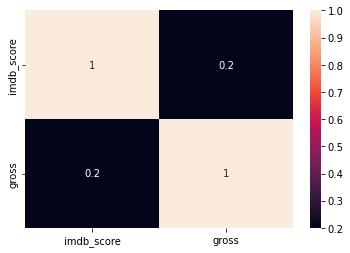

In [9]:
# code here...
#상관관계가 없다
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df[['imdb_score', 'gross']].corr(), annot=True)
plt.show()